# Data Transformation
## 참고자료
- About Feature Scaling: https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer, RobustScaler, OneHotEncoder)

from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import KFold
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)

## Import Breast Cancer Data

In [60]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, test_size=.2)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


# If Skewed Badly
- 만약 데이터가 한쪽에 몰려 분포(왜도)한다면 이를 제거한 후 Scaling을 적용한다. 
- 분포상 평균에서 어느 한쪽으로 떨어질 확률을 비슷하게 만든다.
- Median이 Mean보다 크면 right-tailed 왜도는 양수, 작으면 left-tailed 왜도는 음수가 된다. 
- 정규분포와 같은 분포가 좌우대칭인 데이터는 왜도가 0 

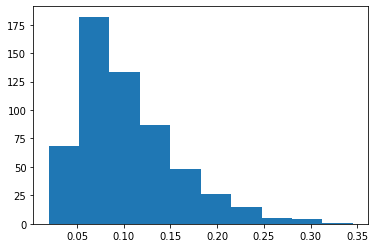

In [62]:
plt.hist(df["mean compactness"]);

## Log transformation
- 음수에 대한 로그는 정의되어있지 않기때문에 Box-Cox를 대안으로 사용하거나 해당 필드의 최소값을 각 변량에 더함으로써 음수 제거

In [63]:
df["mean compactness"].skew(), np.log1p(df["mean compactness"]).skew()

(1.1901230311980404, 1.0431948992217857)

In [78]:
temp = pd.concat(
    [df["mean compactness"], np.log1p(df["mean compactness"])], axis=1
)

temp.columns = ['compactness', 'log_compactness']
temp.head()

,compactness,log_compactness
0,0.27760,0.244983
1,0.07864,0.075701
2,0.15990,0.148334
3,0.28390,0.249902
4,0.13280,0.124692


In [79]:
temp.describe()

,compactness,log_compactness
count,569.000000,569.000000
mean,0.104341,0.098145
std,0.052813,0.046646
min,0.019380,0.019195
25%,0.064920,0.062900
50%,0.092630,0.088588
75%,0.130400,0.122572
max,0.345400,0.296691


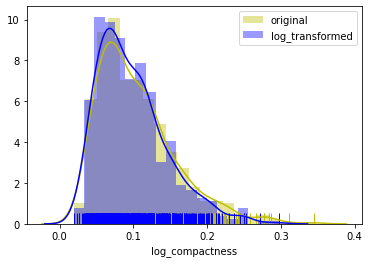

In [80]:
# distplot
plt.subplots(figsize=(6,4))
sns.distplot(temp.compactness, kde=True, rug=True, color="y", label="original")
sns.distplot(temp.log_compactness, kde=True, rug=True, color="b", label="log_transformed") 
plt.legend();

## Sqaure root transformation
- 잘 안씀

In [81]:
df["mean compactness"].skew(), np.sqrt(df["mean compactness"]).skew()

(1.1901230311980404, 0.5647930936224743)

In [82]:
temp = pd.concat(
    [temp, np.sqrt(df["mean compactness"])], axis=1
)

temp.columns = ['compactness', 'log_compactness', 'sqrt_compactness']
temp.head()

,compactness,log_compactness,sqrt_compactness
0,0.27760,0.244983,0.526878
1,0.07864,0.075701,0.280428
2,0.15990,0.148334,0.399875
3,0.28390,0.249902,0.532823
4,0.13280,0.124692,0.364417


In [83]:
temp.describe()

,compactness,log_compactness,sqrt_compactness
count,569.000000,569.000000,569.000000
mean,0.104341,0.098145,0.313519
std,0.052813,0.046646,0.077829
min,0.019380,0.019195,0.139212
25%,0.064920,0.062900,0.254794
50%,0.092630,0.088588,0.304352
75%,0.130400,0.122572,0.361109
max,0.345400,0.296691,0.587707


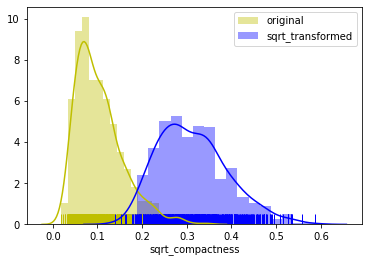

In [84]:
plt.subplots(figsize=(6,4))
sns.distplot(temp.compactness, kde=True, rug=True, color="y", label="original")
sns.distplot(temp.sqrt_compactness, kde=True, rug=True, color="b", label="sqrt_transformed") 
plt.legend();

## Log vs. Sqrt

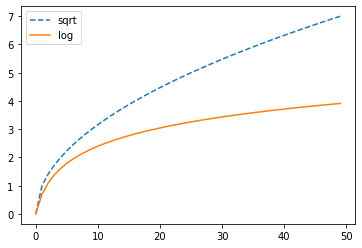

In [85]:
x = np.linspace(0,49,50)
log_x = np.log1p(x)
sqrt_x = np.sqrt(x)

#sqrt가 큰 값에서 더 발산하는 경향
plt.plot(x, sqrt_x, label='sqrt', linestyle='--')  
plt.plot(x, log_x, label='log')
plt.legend();

## Boxcox transformation

In [86]:
from scipy import stats
temp["boxcox_compactness"], _ = stats.boxcox(temp.compactness)


In [89]:
temp["compactness"].skew(), np.sqrt(temp["boxcox_compactness"]).skew()

(1.1901230311980404, nan)

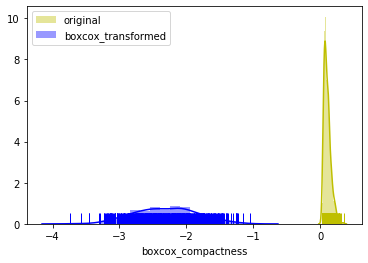

In [91]:
plt.subplots(figsize=(6,4))
sns.distplot(temp.compactness, kde=True, rug=True, color="y", label="original")
sns.distplot(temp.boxcox_compactness, kde=True, rug=True, color="b", label="boxcox_transformed") 
plt.legend();

# Scaler
* 예측 변수의 척도를 중심으로 가져온다. Scaling은 공통 척도를 갖게되고 분산을 줄여줘 계산 시의 수치적 안정성을 향상시켜준다.
* Normalization: rescales the values into a range of [0,1]. 
* Standardization: rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

/Users/donginkim/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/donginkim/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


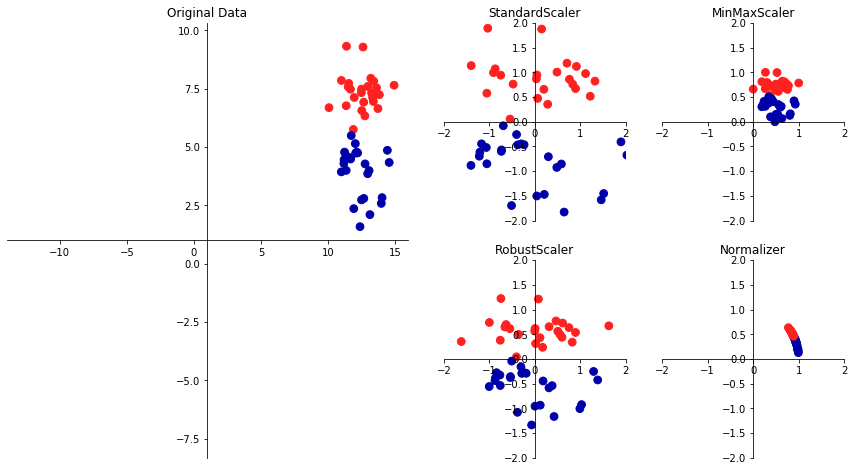

In [92]:
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, Normalizer, RobustScaler, OneHotEncoder)
import mglearn
mglearn.plots.plot_scaling();

## Standardization(z-score normalization)
- 각 변량의 평균을 0, 표준편차를 1로 변환
- Z-score로 변환 
- *(x - mean_x) / (stdv_x)* 
- 최솟값, 최댓값 크기를 제한하지 않음 

### 중심화(MU=0): 
- 평균을 각 변량에서 뺌으로써 척도의 중심을 0으로 이동시킴 

In [94]:
temp['scaled_boxcox_compactness'] = temp.boxcox_compactness - np.mean(temp.boxcox_compactness)
temp.head()

,compactness,log_compactness,sqrt_compactness,boxcox_compactness,scaled_boxcox_compactness
0,0.27760,0.244983,0.526878,-1.259793,1.043231
1,0.07864,0.075701,0.280428,-2.458076,-0.155052
2,0.15990,0.148334,0.399875,-1.788857,0.514167
3,0.28390,0.249902,0.532823,-1.238104,1.064920
4,0.13280,0.124692,0.364417,-1.965209,0.337814


In [99]:
round(temp['boxcox_compactness'].mean(),3), round(temp['scaled_boxcox_compactness'].mean(),3)

(-2.303, -0.0)

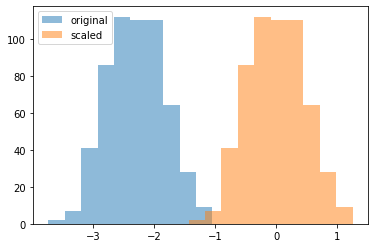

In [103]:
plt.hist(temp.boxcox_compactness, alpha=.5, label="original")
plt.hist(temp.scaled_boxcox_compactness, alpha=.5, label="scaled")
# plt.hist(df.scaled_X2, alpha=.5)
plt.legend();

중심이 0으로 이동하였다.

### 척도화(SD=1):
* 각 예측변수를 표준편차로 나눔으로써 해당 변수의 표준편차를 1로 만듬

In [111]:
temp['scaled_boxcox_compactness'] = temp.boxcox_compactness / np.std(temp.boxcox_compactness)
temp.head()

,compactness,log_compactness,sqrt_compactness,boxcox_compactness,scaled_boxcox_compactness
0,0.27760,0.244983,0.526878,-1.259793,-2.718540
1,0.07864,0.075701,0.280428,-2.458076,-5.304347
2,0.15990,0.148334,0.399875,-1.788857,-3.860222
3,0.28390,0.249902,0.532823,-1.238104,-2.671737
4,0.13280,0.124692,0.364417,-1.965209,-4.240777


In [113]:
round(temp['boxcox_compactness'].std(),3), round(temp['scaled_boxcox_compactness'].std(),3)

(0.464, 1.001)

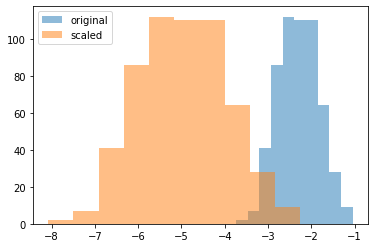

In [114]:
plt.hist(temp.boxcox_compactness, alpha=.5, label="original")
plt.hist(temp.scaled_boxcox_compactness, alpha=.5, label="scaled")
# plt.hist(df.scaled_X2, alpha=.5)
plt.legend();

### Standard Scaler Using Z-score
- 위를 함께 적용하여 각 변량이 평균으로부터 몇 Std 떨어져있는지를 보여준다.

In [151]:
#위의 중심화와 척도화를 함께 구하면 됨
temp["scaled_boxcox_compactness"] = (temp.boxcox_compactness - temp.boxcox_compactness.mean()) / temp.boxcox_compactness.std()  #from scipy.stats import zscore
temp.head()

,compactness,log_compactness,sqrt_compactness,boxcox_compactness,scaled_boxcox_compactness,zscore_compactness
0,0.27760,0.244983,0.526878,-1.259793,2.249237,2.249237
1,0.07864,0.075701,0.280428,-2.458076,-0.334297,-0.334297
2,0.15990,0.148334,0.399875,-1.788857,1.108559,1.108559
3,0.28390,0.249902,0.532823,-1.238104,2.295998,2.295998
4,0.13280,0.124692,0.364417,-1.965209,0.728338,0.728338


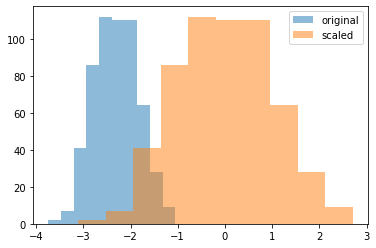

In [118]:
plt.hist(temp.boxcox_compactness, alpha=.5, label="original")
plt.hist(temp.scaled_boxcox_compactness, alpha=.5, label="scaled")
plt.legend();

In [154]:
# Handling outliers 
temp[(temp["scaled_boxcox_compactness"]<-3)]
temp.loc[(temp["scaled_boxcox_compactness"]<-3)|(temp["scaled_boxcox_compactness"]>3)]['scaled_boxcox_compactness']

178   -3.102634
Name: scaled_boxcox_compactness, dtype: float64

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-3.60263356, -3.50263356, -3.40263356, -3.30263356, -3.20263356,
        -3.10263356, -3.00263356, -2.90263356, -2.80263356, -2.70263356,
        -2.60263356]),
 <a list of 10 Patch objects>)

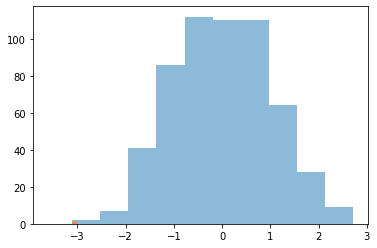

In [155]:
plt.hist(temp.loc[(temp["scaled_boxcox_compactness"]>=-3)|(temp["scaled_boxcox_compactness"]<=3)]['scaled_boxcox_compactness'], alpha=.5)
plt.hist(temp.loc[(temp["scaled_boxcox_compactness"]<-3)|(temp["scaled_boxcox_compactness"]>3)]['scaled_boxcox_compactness'], alpha=.8) #outliers

### StandardScaler
- 위와 동일하나 Sklearn Method 활용하여 Breast Cancer Data에 적용

In [119]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


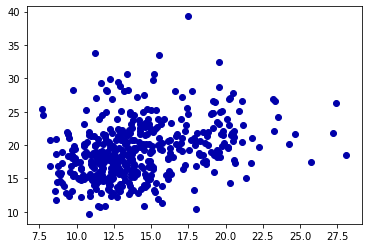

In [120]:
# 기존 데이터
plt.scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2.colors[0])

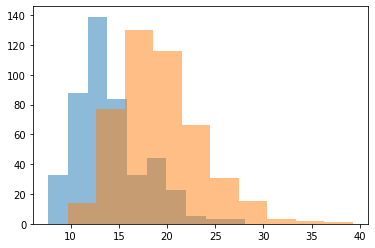

In [121]:
plt.hist(X_train[:,0], alpha=0.5)
plt.hist(X_train[:,1], alpha=0.5);

피쳐들간 스케일의 차이가 있는 것을 알 수 있다

In [122]:
scaler = StandardScaler()
scaler.fit(X_train)  #훈련세트에 있는 특성마다 standard scaling을 해줌 
X_train_scaled = scaler.transform(X_train)  #fit메서드로 학습한 변환을 적용 (실제로 훈련 데이터의 스케일을 조정함)
X_test_scaled = scaler.transform(X_test)  #train세트에서 사용한 변환을 test에 적용해야 함 
#fit_transform로 한번에 적용가능

In [123]:
X_train_scaled.min(), X_train_scaled.max(), round(X_train_scaled.mean()), round(X_train_scaled.std())

(-3.100011345678773, 11.31029435566468, -0.0, 1.0)

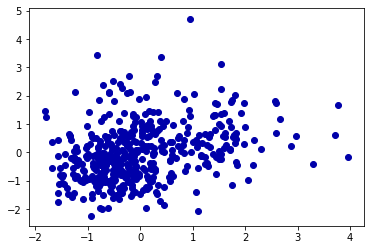

In [124]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0]);

축의 눈금이 바뀐 것만 빼면 기존 그래프와 동일한 분포

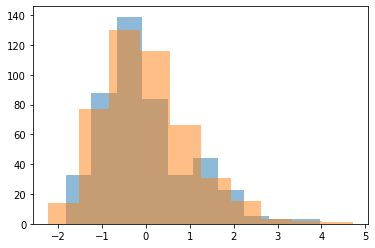

In [125]:
plt.hist(X_train_scaled[:,0], alpha=0.5)
plt.hist(X_train_scaled[:,1], alpha=0.5);

피쳐들간 스케일이 맞춰짐으로써 분포를 정확하게 비교할 수 있다.

## RobustScaler
- 특성들이 같은 스케일을 갖게 된다는 측면에서는 Standard Scaler와 비슷 
- 하지만 평균과 분산대신 Median과 Quartile을 사용
- Outliers에 영향 받지 않음
- *(x - q2) / (q3 - q1)*
- q2는 Median 

In [126]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)  #train세트에서 사용한 변환을 test에 적용해야 함 

In [127]:
X_train_scaled.min(), X_train_scaled.max(), round(X_train_scaled.mean()), round(X_train_scaled.std())

(-2.242456608811748, 20.249657601252203, 0.0, 1.0)

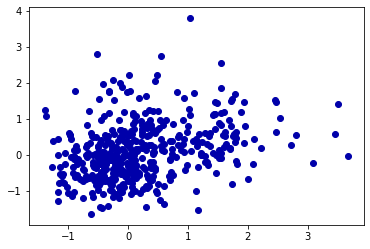

In [128]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0])

(array([ 14.,  77., 130., 116.,  66.,  31.,  15.,   3.,   2.,   1.]),
 array([-1.6565097 , -1.11043398, -0.56435826, -0.01828255,  0.52779317,
         1.07386888,  1.6199446 ,  2.16602031,  2.71209603,  3.25817175,
         3.80424746]),
 <a list of 10 Patch objects>)

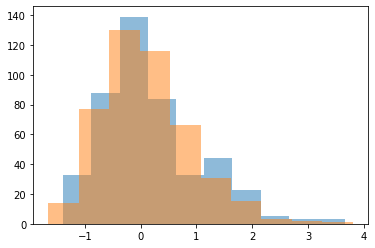

In [129]:
plt.hist(X_train_scaled[:,0], alpha=0.5)
plt.hist(X_train_scaled[:,1], alpha=0.5)

## MinMaxScaler
- 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경
- *(x - x_min) / (x_max - x_min)*

In [130]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)  #train세트에서 사용한 변환을 test에 적용해야 함 

In [131]:
X_train_scaled.min(), X_train_scaled.max(), round(X_train_scaled.mean()), round(X_train_scaled.std())

(0.0, 1.0000000000000002, 0.0, 0.0)

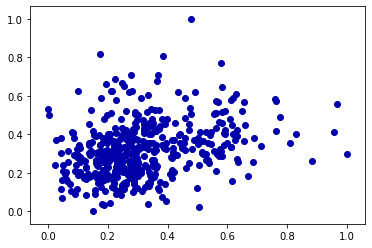

In [132]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0])

(array([ 14.,  77., 130., 116.,  66.,  31.,  15.,   3.,   2.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

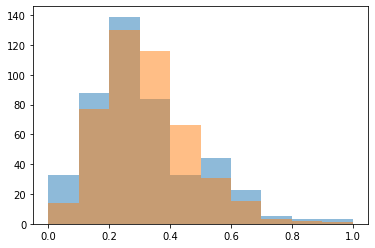

In [133]:
plt.hist(X_train_scaled[:,0], alpha=0.5)
plt.hist(X_train_scaled[:,1], alpha=0.5)

## Normalizer
- 데이터가 가우시안분포를 따르도록 변형
- 67%:[-1,1], 95%:[-2,2], 99%:[-3,3]의 범위에 들어가도록 변형
- 각 데이터 포인트가 다른 비율로 스케일이 조정됨 
- 특성 벡터의 Euclidean Distance가 1이 되도록 데이터 포인트를 조정
- 특성 벡터의 길이는 상관없고 데이터의 방향만이 중요할 때 사용
- 즉 길이가 1인 원 또는 구로 투영하는 것이고, 각도만이 중요할 때 적용합니다.
- l1, l2, max 옵션을 제공하며 유클리디안 커리인 l2가 기본값입니다.


In [134]:
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [135]:
X_train_scaled.min(), X_train_scaled.max(), round(X_train_scaled.mean()), round(X_train_scaled.std())

(0.0, 0.9212432903035122, 0.0, 0.0)

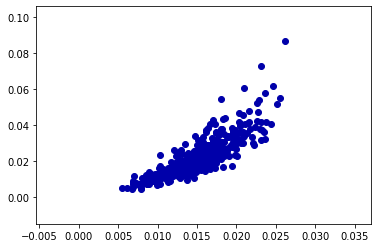

In [136]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2.colors[0])

(array([ 96., 142., 128.,  51.,  24.,   6.,   6.,   0.,   1.,   1.]),
 array([0.00456826, 0.01277231, 0.02097637, 0.02918042, 0.03738448,
        0.04558853, 0.05379259, 0.06199664, 0.0702007 , 0.07840475,
        0.08660881]),
 <a list of 10 Patch objects>)

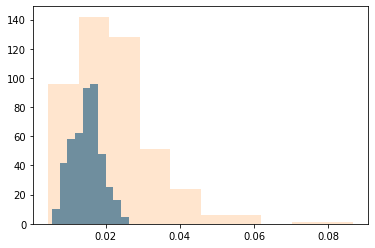

In [137]:
plt.hist(X_train_scaled[:,0], alpha=0.8)
plt.hist(X_train_scaled[:,1], alpha=0.2)

## 지도 학습에서의 Scaling 효과

In [139]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [140]:
svm = SVC(100)
svm.fit(X_train, y_train)
print(f"test-set accuracy: {svm.score(X_test, y_test)}")

test-set accuracy: 0.6228070175438597


/Users/donginkim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [141]:
svm.fit(X_train_scaled, y_train)
print(f"scaled test-set accuracy: {svm.score(X_test_scaled, y_test)}")

scaled test-set accuracy: 0.9385964912280702


/Users/donginkim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
